### Run the following chunk of code to import any libraries and packages necessary for running the rest of the code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os as os
import pandas as pd

### Run the following chunk of code to plot the sum of the forces for both the electrostatic and hydrophobic forces.
The following code will plot the sum of the electrostatic and hydrophobic forces with errorbars which correspond to one standard deviation from the mean. Note, the user will need to adjust the directory variables to match their directory structure, or change their directory structure to match the directory variables.

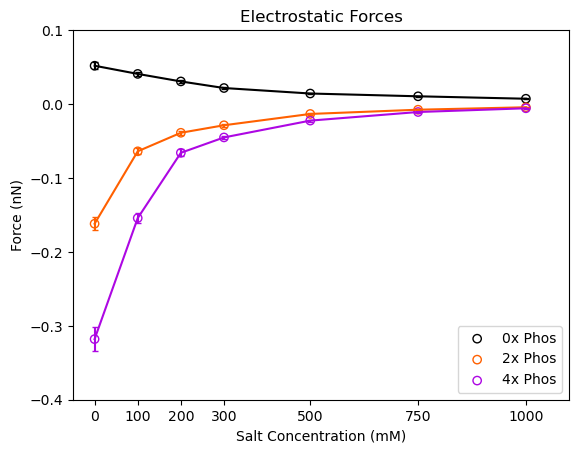

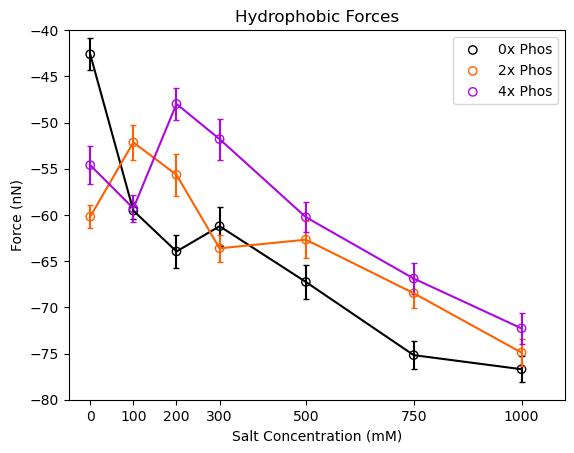

In [7]:
base_Directory = ""

phosphorylations = [0,2,4]
protein_Concentration = 20
salt_Concentrations = [0,100,200,300,500,750,1000]

force_Conversion = 1*10**9 #nN per N

zero_x_Concentrations = []
two_x_Concentrations = []
four_x_Concentrations = []

zero_x_Phos_Electrostatic_Forces = []
two_x_Phos_Electrostatic_Forces = []
four_x_Phos_Electrostatic_Forces = []
zero_x_Phos_Electrostatic_Errors = []
two_x_Phos_Electrostatic_Errors = []
four_x_Phos_Electrostatic_Errors = []


zero_x_Phos_Hydrophobic_Forces = []
two_x_Phos_Hydrophobic_Forces = []
four_x_Phos_Hydrophobic_Forces = []
zero_x_Phos_Hydrophobic_Errors = []
two_x_Phos_Hydrophobic_Errors = []
four_x_Phos_Hydrophobic_Errors = []

for phos in phosphorylations:
    input_Working_Directory_One = base_Directory + "Inputs/Electrostatic/Mean/" + str(phos) + "x_Phos/"
    input_Working_Directory_Two = base_Directory + "Inputs/Hydrophobic/Mean/" + str(phos) + "x_Phos/"
    input_Working_Directory_Three = base_Directory + "Inputs/Electrostatic/SD/" + str(phos) + "x_Phos/"
    input_Working_Directory_Four = base_Directory + "Inputs/Hydrophobic/SD/" + str(phos) + "x_Phos/"
    output_Working_Directory = base_Directory + "Outputs/"
    
    for concentration in salt_Concentrations:
        for file in os.listdir(input_Working_Directory_One):
            if ((str(protein_Concentration) + "_uM_" in file) & ("_" + str(concentration) + "_mM_" in file)):
                electrostatic_Sums = np.load(input_Working_Directory_One + file)
                hydrophobic_Sums = np.load(input_Working_Directory_Two + file.replace("Electrostatic","Hydrophobic"))
                electrostatic_Errors = np.load(input_Working_Directory_Three + file.replace("Force_Sums_Electrostatic","Force_Errors_Electrostatic"))
                hydrophobic_Errors = np.load(input_Working_Directory_Four + file.replace("Force_Sums_Electrostatic","Force_Errors_Hydrophobic"))
                
                if phos == 0:
                    zero_x_Concentrations.append(concentration)
                    zero_x_Phos_Electrostatic_Forces.append(electrostatic_Sums)
                    zero_x_Phos_Hydrophobic_Forces.append(hydrophobic_Sums)
                    zero_x_Phos_Electrostatic_Errors.append(electrostatic_Errors)
                    zero_x_Phos_Hydrophobic_Errors.append(hydrophobic_Errors)
                elif phos == 2:
                    two_x_Concentrations.append(concentration)
                    two_x_Phos_Electrostatic_Forces.append(electrostatic_Sums)
                    two_x_Phos_Hydrophobic_Forces.append(hydrophobic_Sums)
                    two_x_Phos_Electrostatic_Errors.append(electrostatic_Errors)
                    two_x_Phos_Hydrophobic_Errors.append(hydrophobic_Errors) 
                else:
                    four_x_Concentrations.append(concentration)
                    four_x_Phos_Electrostatic_Forces.append(electrostatic_Sums)
                    four_x_Phos_Hydrophobic_Forces.append(hydrophobic_Sums)
                    four_x_Phos_Electrostatic_Errors.append(electrostatic_Errors)
                    four_x_Phos_Hydrophobic_Errors.append(hydrophobic_Errors) 

zero_x_Phos_Electrostatic_Forces = np.asarray(zero_x_Phos_Electrostatic_Forces.copy())*force_Conversion
two_x_Phos_Electrostatic_Forces = np.asarray(two_x_Phos_Electrostatic_Forces.copy())*force_Conversion
four_x_Phos_Electrostatic_Forces = np.asarray(four_x_Phos_Electrostatic_Forces.copy())*force_Conversion
zero_x_Phos_Electrostatic_Errors = np.asarray(zero_x_Phos_Electrostatic_Errors.copy())*force_Conversion
two_x_Phos_Electrostatic_Errors = np.asarray(two_x_Phos_Electrostatic_Errors.copy())*force_Conversion
four_x_Phos_Electrostatic_Errors = np.asarray(four_x_Phos_Electrostatic_Errors.copy())*force_Conversion

zero_x_Phos_Hydrophobic_Forces = np.asarray(zero_x_Phos_Hydrophobic_Forces.copy())*force_Conversion
two_x_Phos_Hydrophobic_Forces = np.asarray(two_x_Phos_Hydrophobic_Forces.copy())*force_Conversion
four_x_Phos_Hydrophobic_Forces = np.asarray(four_x_Phos_Hydrophobic_Forces.copy())*force_Conversion
zero_x_Phos_Hydrophobic_Errors = np.asarray(zero_x_Phos_Hydrophobic_Errors.copy())*force_Conversion
two_x_Phos_Hydrophobic_Errors = np.asarray(two_x_Phos_Hydrophobic_Errors.copy())*force_Conversion
four_x_Phos_Hydrophobic_Errors = np.asarray(four_x_Phos_Hydrophobic_Errors.copy())*force_Conversion

plt.figure()
plt.scatter(np.asarray(zero_x_Concentrations),np.asarray(zero_x_Phos_Electrostatic_Forces), label = "0x Phos", color = "black", facecolor = "None")
plt.errorbar(np.asarray(zero_x_Concentrations),np.asarray(zero_x_Phos_Electrostatic_Forces),zero_x_Phos_Electrostatic_Errors, color = "black", capsize = 2)
plt.scatter(np.asarray(two_x_Concentrations),np.asarray(two_x_Phos_Electrostatic_Forces), label = "2x Phos", color = "#ff6000ff", facecolor = "None")
plt.errorbar(np.asarray(two_x_Concentrations),np.asarray(two_x_Phos_Electrostatic_Forces),two_x_Phos_Electrostatic_Errors, color = "#ff6000ff", capsize = 2)
plt.scatter(np.asarray(four_x_Concentrations),np.asarray(four_x_Phos_Electrostatic_Forces), label = "4x Phos", color = "#ad07e3ff", facecolor = "None")
plt.errorbar(np.asarray(four_x_Concentrations),np.asarray(four_x_Phos_Electrostatic_Forces),four_x_Phos_Electrostatic_Errors, color = "#ad07e3ff", capsize = 2)
plt.title("Electrostatic Forces")
plt.ylabel("Force (nN)")
plt.xlabel("Salt Concentration (mM)")
plt.xticks([0,100,200,300,500,750,1000])
plt.ylim(-0.4,0.1)
plt.xlim(-50,1100)
plt.legend(loc = "lower right")
plt.savefig(output_Working_Directory + "Force_Sums_Electrostatic.png")
plt.savefig(output_Working_Directory + "Force_Sums_Electrostatic.svg")
plt.show()

plt.figure()
plt.scatter(np.asarray(zero_x_Concentrations),np.asarray(zero_x_Phos_Hydrophobic_Forces), label = "0x Phos", color = "black", facecolor = "none")
plt.errorbar(np.asarray(zero_x_Concentrations),np.asarray(zero_x_Phos_Hydrophobic_Forces),zero_x_Phos_Hydrophobic_Errors, color = "black", capsize = 2)
plt.scatter(np.asarray(two_x_Concentrations),np.asarray(two_x_Phos_Hydrophobic_Forces), label = "2x Phos", color = "#ff6000ff", facecolor = "none")
plt.errorbar(np.asarray(two_x_Concentrations),np.asarray(two_x_Phos_Hydrophobic_Forces),two_x_Phos_Hydrophobic_Errors,color = "#ff6000ff", capsize = 2)
plt.scatter(np.asarray(four_x_Concentrations),np.asarray(four_x_Phos_Hydrophobic_Forces), label = "4x Phos", color = "#ad07e3ff", facecolor = "none")
plt.errorbar(np.asarray(four_x_Concentrations),np.asarray(four_x_Phos_Hydrophobic_Forces),[four_x_Phos_Hydrophobic_Errors], color = "#ad07e3ff", capsize = 2)
plt.title("Hydrophobic Forces")
plt.ylabel("Force (nN)")
plt.xlabel("Salt Concentration (mM)")
plt.xticks([0,100,200,300,500,750,1000])
plt.legend(loc = "upper right")
plt.ylim(-80,-40)
plt.xlim(-50,1100)
plt.savefig(output_Working_Directory + "Force_Sums_Hydrophobic.png")
plt.savefig(output_Working_Directory + "Force_Sums_Hydrophobic.svg")
plt.show()